In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sentence_transformers import SentenceTransformer

# Download stopwords 
import nltk
nltk.download('punkt')
nltk.download('stopwords')

/Users/ramaalmrahleh/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ramaalmrahleh/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ramaalmrahleh/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
data = pd.read_csv("Resume.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2484 entries, 0 to 2483
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   ID           2484 non-null   int64 
 1   Resume_str   2484 non-null   object
 2   Resume_html  2484 non-null   object
 3   Category     2484 non-null   object
dtypes: int64(1), object(3)
memory usage: 77.8+ KB


In [4]:
data.drop(columns=['Resume_html'], inplace=True)

In [5]:
data['Category'].value_counts()

Category
INFORMATION-TECHNOLOGY    120
BUSINESS-DEVELOPMENT      120
FINANCE                   118
ADVOCATE                  118
ACCOUNTANT                118
ENGINEERING               118
CHEF                      118
AVIATION                  117
FITNESS                   117
SALES                     116
BANKING                   115
HEALTHCARE                115
CONSULTANT                115
CONSTRUCTION              112
PUBLIC-RELATIONS          111
HR                        110
DESIGNER                  107
ARTS                      103
TEACHER                   102
APPAREL                    97
DIGITAL-MEDIA              96
AGRICULTURE                63
AUTOMOBILE                 36
BPO                        22
Name: count, dtype: int64

/var/folders/dm/y1vt4m8j43xbl9qk9zyfh22h0000gn/T/ipykernel_64828/946927455.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=data['Category'], palette='viridis')


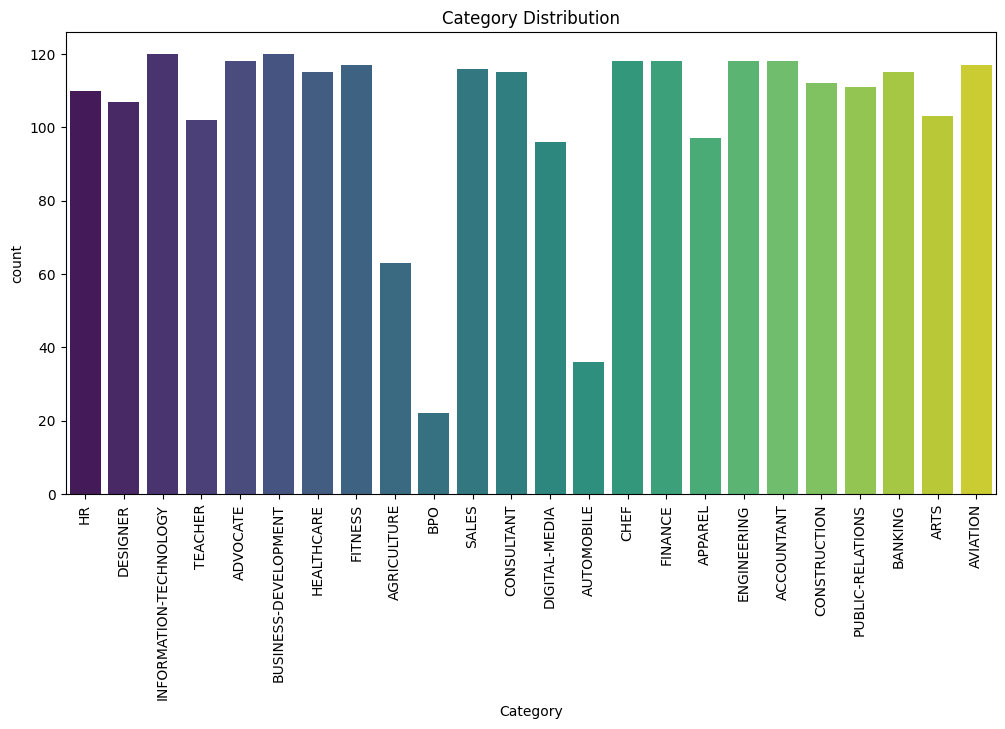

In [6]:
plt.figure(figsize=(12, 6))
sns.countplot(x=data['Category'], palette='viridis') 
plt.xticks(rotation=90)
plt.title('Category Distribution')
plt.show()

In [7]:
# Filter data for the "HR" category
hr_data = data[data['Category'] == 'HR']
print(f"Number of resumes in HR category: {hr_data.shape[0]}")


Number of resumes in HR category: 110


In [ ]:
job_description = """Job Summary:
We are looking for HR candidate - senior role at the HR department in Amman.
Qualified candidates will have experience at the senior level and effectively manage all processes relating to employee relations, compliance, staffing, training, and culture.
Education
• Bachelor's degree in Human Resources Management or a business-related subject.

Job Requirements:
• Good knowledge of employment regulations.
• Excellent knowledge of HR practices.
• Vast working knowledge of all HR departmental areas, including reward and recognition, welfare, learning, and development, as well as HR systems and budgets.
• Knowledge of Jordan, KSA, and UAE labor law. 
• The ability to develop and nurture relationships across departments.
• The confidence to provide sound professional advice.
• The ability to lead the development of effective employment policies.
• Excellent knowledge and understanding of regulations, accepted professional standards, policies, procedures, and legislation.
• The ability to analyze and review HR data to identify trends.
• Candidates should have high negotiation and strong persuasive skills with the customers.

Duties & responsibilities:
• Provide reports on all areas of HR, onboarding, payroll, learning and development, HR policy, best practices, and workforce development.
• Advise and strategize on developing effective employment policies across the company. 
• Provide professional leadership, support, and development to HR staff to increase knowledge, share best practices, and ensure that relevant professional standards are met.
• Ensure that the company complies with current regulations, accepted professional standards, policies and procedures, and legislation
• Manage the execution of the HR strategy and core areas of the HR department, including recruitment, employee relations, workforce administration, employee engagement, payroll, reward, and recognition, as well as maintaining and improving HR systems and management of the HR budget. 
• Drive the continuous improvement agenda with a focus on engagement & welfare activities, maximizing productivity, devolving HR responsibilities to line managers, and building leadership capability.
• Ensure managers are sufficiently skilled and enabled to access appropriate guidance and information to manage workforce issues.
Minimum Requirements:

• 5–7 years of experience in the HR role.
• A pro-active attitude and a passion for leading with integrity.
• Experience in managing a skilled team and making quick but rational decisions.
• Good time management skills and the ability to prioritize, problem-solve, and use your initiative.
• Fluent in English & Arabic is a must
Knowledge, Skills, Attitude:
• Self-disciplined
• Able to solve problems in a positive manner in short time
• Strong persuasive skills and ability to exercise influence beyond the direct authority
• Presentable and good general communication skills
• Able to work in a fast-paced environment.

Employment Type
• Full-time"""